In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user=pd.read_csv('adfeature - Sheet2.csv')

In [3]:
user.head()

,userid,ad1,ad2,ad3,ad4,ad5
0,234,1,NaN,0,1.0,1
1,235,0,NaN,1,0.0,0
2,236,1,NaN,0,NaN,0
3,237,0,1.0,1,0.0,0
4,238,0,1.0,1,NaN,0


In [4]:
user_detail=pd.read_csv('adfeature - Sheet3 (1).csv')
user_detail.head()

,userid,uniqueID,gender,age,consumption,shopping,occupation
0,234,S8734933,0,24,2,1,2
1,235,L9549177,0,19,3,1,2
2,236,E911653,0,19,3,2,2
3,237,Q757747,1,23,3,3,2
4,238,>6176475,0,25,3,3,1


In [5]:
user.describe()

,userid,ad1,ad2,ad3,ad4,ad5
count,4999.000000,4999.00000,3349.000000,4999.000000,3303.000000,4999.000000
mean,2733.000000,0.49970,0.491191,0.496499,0.506812,0.492899
std,1443.231328,0.50005,0.499997,0.500038,0.500029,0.500000
min,234.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1483.500000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2733.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,3982.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,5232.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [6]:
user.isnull().sum()

userid       0
ad1          0
ad2       1650
ad3          0
ad4       1696
ad5          0
dtype: int64

In [7]:
user_detail.isnull().sum()

userid         0
uniqueID       0
gender         0
age            0
consumption    0
shopping       0
occupation     0
dtype: int64

In [8]:
user.duplicated().sum()

0

In [9]:
user_detail.duplicated().sum()

0

In [10]:
user=pd.read_csv('adfeature - Sheet2.csv',index_col=0)
user_data = user.fillna(user.mean(axis=0))
user_data

,ad1,ad2,ad3,ad4,ad5
userid,,,,,
234,1,0.491191,0,1.000000,1
235,0,0.491191,1,0.000000,0
236,1,0.491191,0,0.506812,0
237,0,1.000000,1,0.000000,0
238,0,1.000000,1,0.506812,0
...,...,...,...,...,...
5228,0,0.491191,1,1.000000,0
5229,1,0.491191,0,0.506812,0
5230,0,1.000000,1,1.000000,1


In [11]:
cosine = cosine_similarity(user_data)
np.fill_diagonal(cosine, 0 )
similarity_with_ads =pd.DataFrame(cosine,index=user_data.index)
similarity_with_ads.columns=user_data.index
similarity_with_ads.head()

userid,234,235,236,237,238,239,240,241,242,243,...,5223,5224,5225,5226,5227,5228,5229,5230,5231,5232
userid,,,,,,,,,,,,,,,,,,,,,
234,0.000000,0.120285,0.793286,0.192920,0.368997,0.251100,0.614949,0.392760,0.785520,0.962062,...,0.691479,0.798894,0.798894,0.738731,0.392760,0.460534,0.793286,0.691862,0.339482,0.460534
235,0.120285,0.000000,0.176927,0.946423,0.890940,0.800615,0.741653,0.634676,0.000000,0.000000,...,0.618836,0.254541,0.254541,0.293471,0.634676,0.744194,0.176927,0.669222,0.910246,0.744194
236,0.793286,0.176927,0.000000,0.283767,0.406822,0.187187,0.338654,0.000000,0.292791,0.710762,...,0.793286,0.942456,0.703394,0.406822,0.000000,0.408251,1.000000,0.407688,0.332500,0.677399
237,0.192920,0.946423,0.283767,0.000000,0.941375,0.630728,0.783638,0.500000,0.000000,0.000000,...,0.585681,0.408248,0.408248,0.470688,0.500000,0.704322,0.283767,0.707107,0.861478,0.704322
238,0.368997,0.890940,0.406822,0.941375,0.000000,0.746261,0.832440,0.470688,0.238550,0.194775,...,0.738731,0.579090,0.384315,0.556906,0.470688,0.888377,0.406822,0.834333,0.950664,0.663032


In [12]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [13]:
sim_user_30_m = find_n_neighbours(similarity_with_ads,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userid,,,,,,,,,,,,,,,,,,,,,
234,760,4605,2275,3444,1197,2347,2364,2380,4467,2412,...,4395,4925,1961,4306,1420,339,2001,334,4932,4305
235,699,4115,2446,1352,989,3781,2817,4851,4623,4869,...,3110,3903,2121,1101,5106,407,415,4977,4294,4861
236,2405,1471,3811,4671,575,860,555,4710,2648,1824,...,2740,4614,1623,4475,732,5049,2905,2463,4507,4361
237,3302,5162,521,2746,1214,4678,1573,3864,3158,820,...,4644,502,4619,3945,4490,4491,1789,393,5090,5092
238,4315,4617,3193,3674,4350,1703,1131,1510,877,5171,...,3099,2535,1652,608,709,4141,903,1676,1415,2554


In [14]:
user

,ad1,ad2,ad3,ad4,ad5
userid,,,,,
234,1,NaN,0,1.0,1
235,0,NaN,1,0.0,0
236,1,NaN,0,NaN,0
237,0,1.0,1,0.0,0
238,0,1.0,1,NaN,0
...,...,...,...,...,...
5228,0,NaN,1,1.0,0
5229,1,NaN,0,NaN,0
5230,0,1.0,1,1.0,1


In [15]:
indices = []
for i in range(user.shape[0]):
    for j in range(user.shape[1]):
        if user.isnull().iloc[i,j] == True:
            indices.append((i,j))
            
for i in range(len(indices)):
    sum=0
    average=0
    for j in range(30):
        index = sim_user_30_m.iloc[indices[i][0],j]
        sum+= user_data.iloc[index-234,indices[i][1]]
    average = sum/30    
    if average >=0.5:
        user.iloc[indices[i][0],indices[i][1]]=1
    else: 
        user.iloc[indices[i][0],indices[i][1]]=0
user

,ad1,ad2,ad3,ad4,ad5
userid,,,,,
234,1,0.0,0,1.0,1
235,0,0.0,1,0.0,0
236,1,0.0,0,1.0,0
237,0,1.0,1,0.0,0
238,0,1.0,1,1.0,0
...,...,...,...,...,...
5228,0,0.0,1,1.0,0
5229,1,0.0,0,1.0,0
5230,0,1.0,1,1.0,1


In [16]:
data=pd.read_csv('adfeature - Sheet5.csv')

In [17]:
data.head()

,userid,gender,age,consumption level,shopping level,occupation level,ad1,ad2,ad3,ad4,ad5,CTR VALUE
0,234,0,21,3,1,1,0,0,0,0,0,0
1,235,1,17,3,2,2,0,0,0,1,1,2
2,236,1,16,1,1,2,1,0,0,1,1,3
3,237,0,24,2,3,1,0,0,1,0,0,1
4,238,0,19,1,2,1,0,1,0,1,0,2


In [18]:
data.isnull().sum()

userid               0
gender               0
age                  0
consumption level    0
shopping level       0
 occupation level    0
ad1                  0
ad2                  0
ad3                  0
ad4                  0
ad5                  0
CTR VALUE            0
dtype: int64

Text(0.5, 0, 'gender')

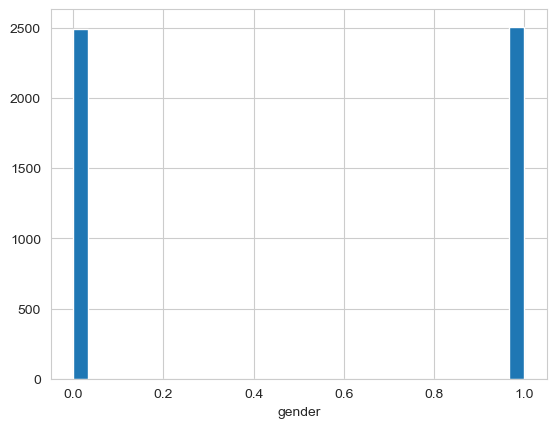

In [19]:
sns.set_style('whitegrid')
data['gender'].hist(bins=30)
plt.xlabel('gender')

Text(0.5, 0, 'age')

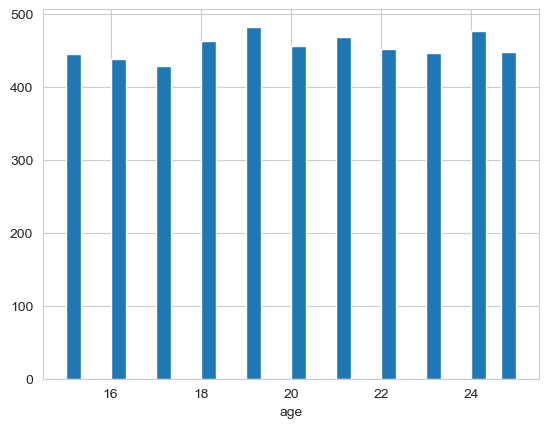

In [20]:
sns.set_style('whitegrid')
data['age'].hist(bins=30)
plt.xlabel('age')

Text(0.5, 0, 'consumption level')

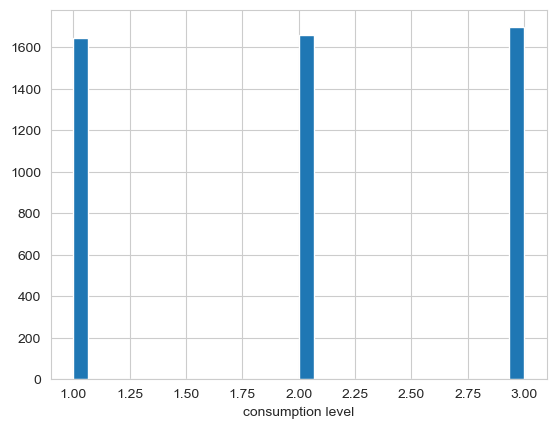

In [21]:
sns.set_style('whitegrid')
data['consumption level'].hist(bins=30)
plt.xlabel('consumption level')

Text(0.5, 0, 'shopping level')

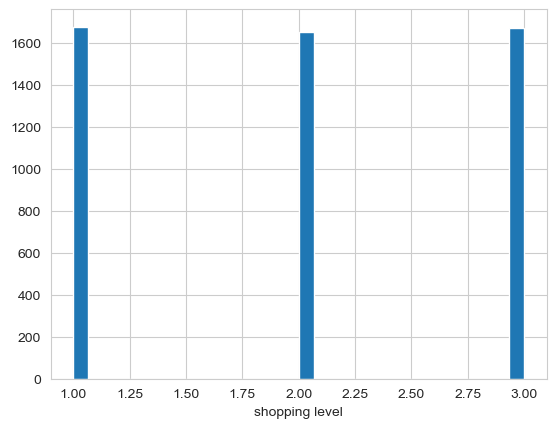

In [22]:
sns.set_style('whitegrid')
data['shopping level'].hist(bins=30)
plt.xlabel('shopping level')

Text(0.5, 0, 'occupation level')

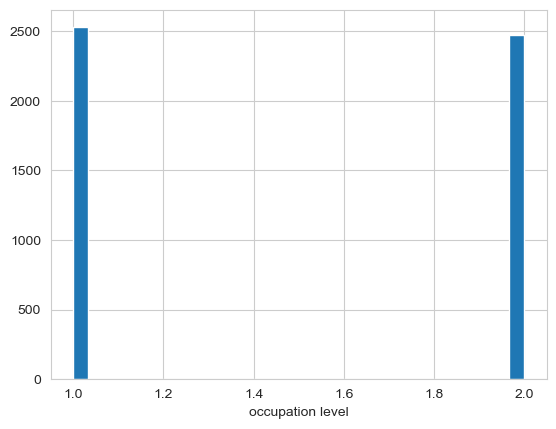

In [23]:
sns.set_style('whitegrid')
data[' occupation level'].hist(bins=30)
plt.xlabel('occupation level')

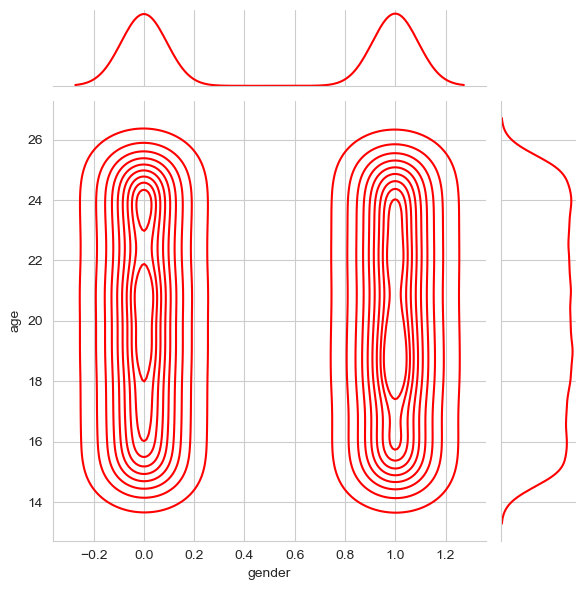

In [24]:
sns.jointplot(x = 'gender', y = 'age', data = data, color = 'red', kind = 'kde')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gender', ylabel='Density'>

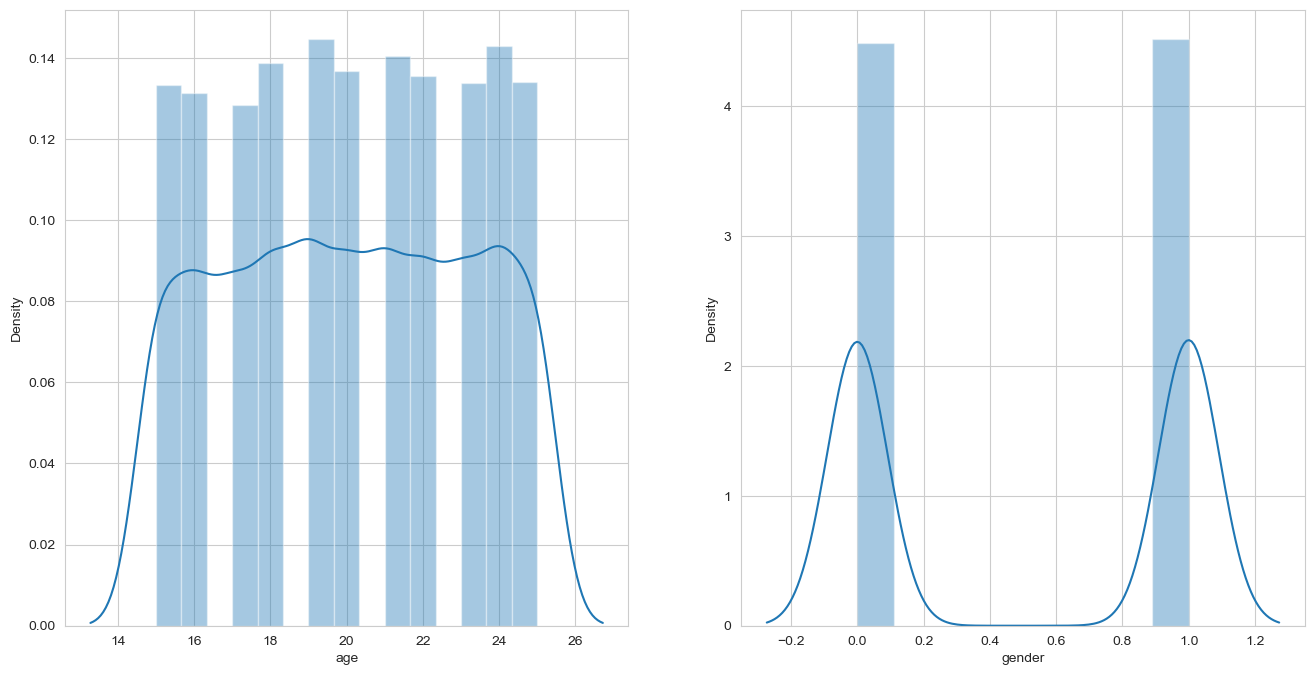

In [25]:
import seaborn as sb
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sb.distplot(data['age'],ax=ax[0]) 
sb.distplot(data['gender'],ax=ax[1])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel=' occupation level', ylabel='Density'>

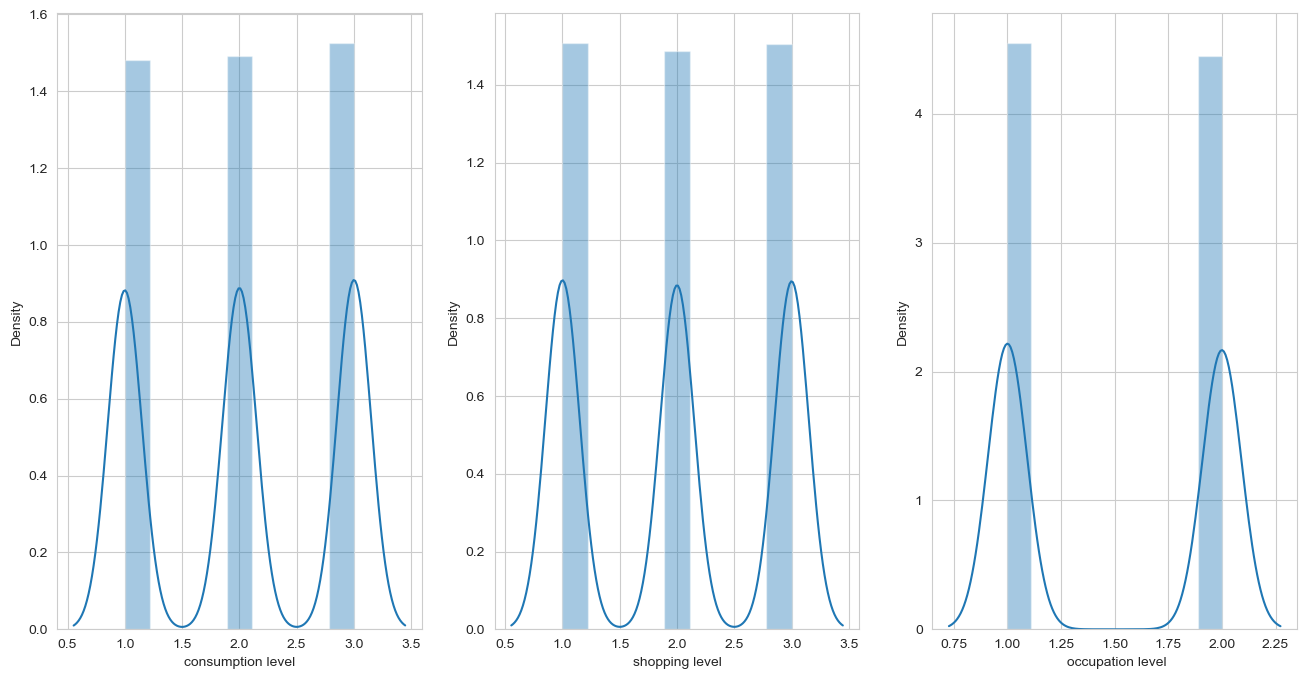

In [26]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sb.distplot(data['consumption level'],ax=ax[0]) 
sb.distplot(data['shopping level'],ax=ax[1])
sb.distplot(data[' occupation level'],ax=ax[2])


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel=' occupation level', ylabel='Density'>

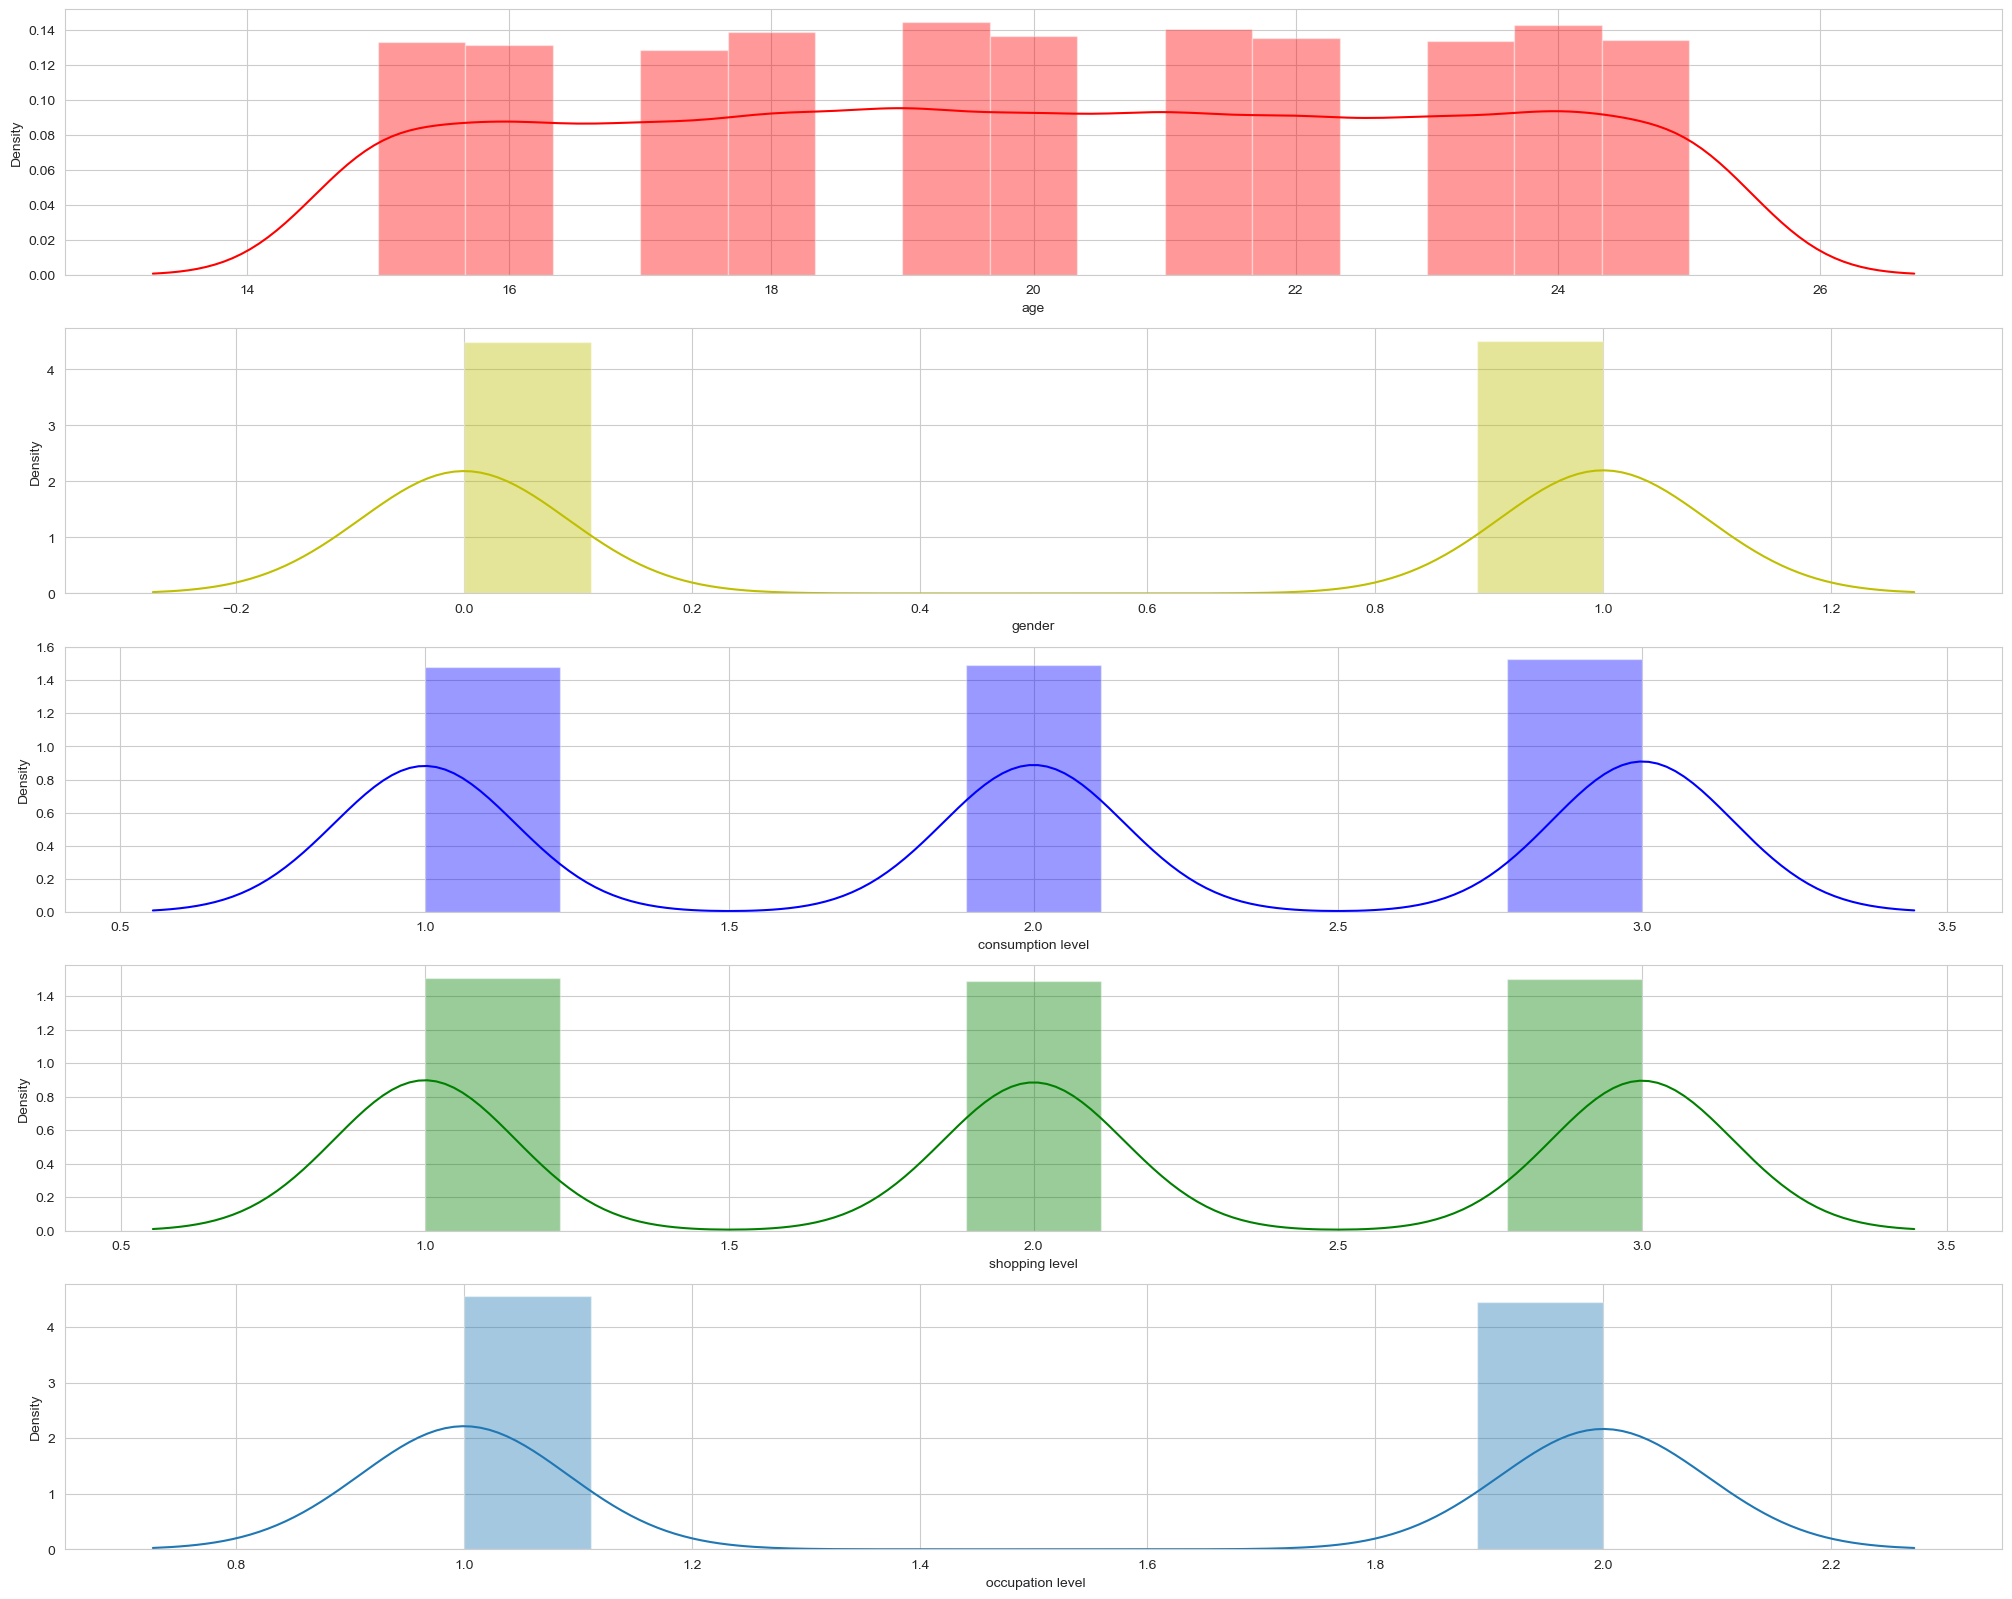

In [27]:
fig, ax = plt.subplots(5,1,figsize=(25,20)) 
sb.distplot(data['age'],ax=ax[0],color='r') 
sb.distplot(data['gender'],ax=ax[1],color='y')
sb.distplot(data['consumption level'],ax=ax[2],color='b') 
sb.distplot(data['shopping level'],ax=ax[3],color='g') 
sb.distplot(data[' occupation level'],ax=ax[4]) 

In [28]:
data

,userid,gender,age,consumption level,shopping level,occupation level,ad1,ad2,ad3,ad4,ad5,CTR VALUE
0,234,0,21,3,1,1,0,0,0,0,0,0
1,235,1,17,3,2,2,0,0,0,1,1,2
2,236,1,16,1,1,2,1,0,0,1,1,3
3,237,0,24,2,3,1,0,0,1,0,0,1
4,238,0,19,1,2,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,5228,1,15,3,3,2,0,1,0,1,1,3
4995,5229,1,20,3,2,2,0,1,1,1,0,3
4996,5230,1,25,2,3,2,0,1,1,1,1,4
4997,5231,0,18,1,3,2,0,1,1,0,1,3


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='ad5', ylabel='Density'>

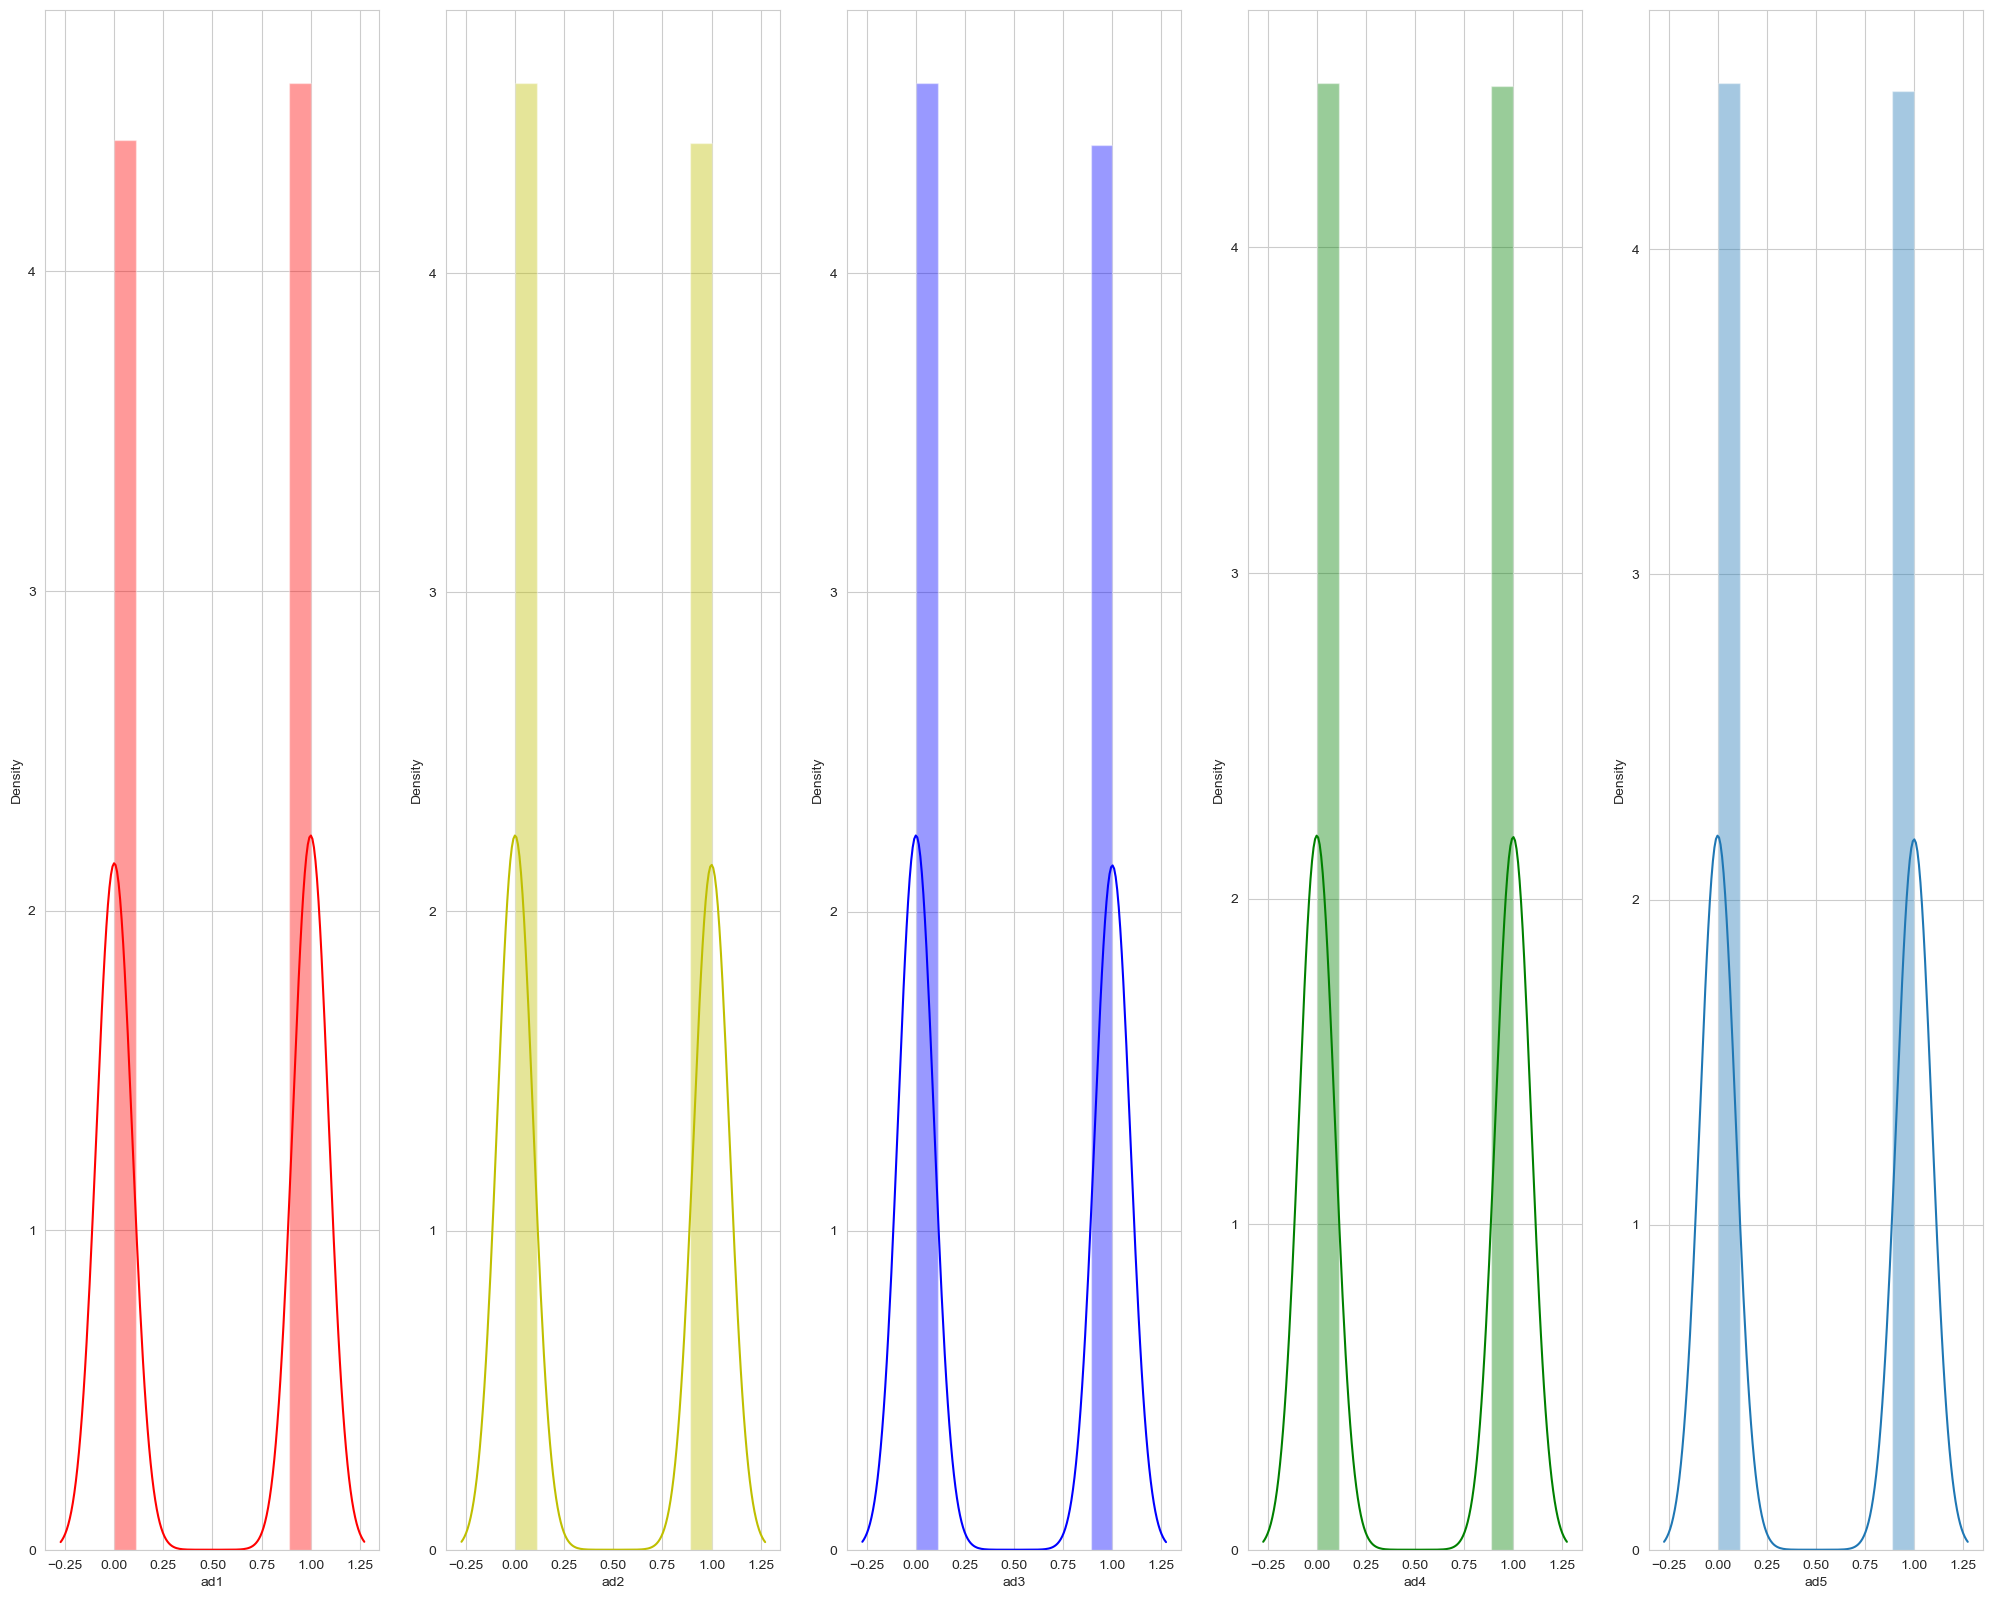

In [29]:
fig, ax = plt.subplots(1,5,figsize=(25,20)) 
sb.distplot(data['ad1'],ax=ax[0],color='r') 
sb.distplot(data['ad2'],ax=ax[1],color='y')
sb.distplot(data['ad3'],ax=ax[2],color='b') 
sb.distplot(data['ad4'],ax=ax[3],color='g') 
sb.distplot(data['ad5'],ax=ax[4]) 

Text(0.5, 0, 'CTR VALUE')

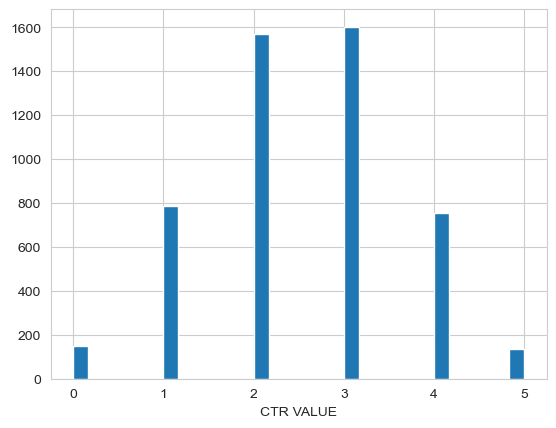

In [30]:
sns.set_style('whitegrid')
data['CTR VALUE'].hist(bins=30)
plt.xlabel('CTR VALUE')

In [31]:
data

,userid,gender,age,consumption level,shopping level,occupation level,ad1,ad2,ad3,ad4,ad5,CTR VALUE
0,234,0,21,3,1,1,0,0,0,0,0,0
1,235,1,17,3,2,2,0,0,0,1,1,2
2,236,1,16,1,1,2,1,0,0,1,1,3
3,237,0,24,2,3,1,0,0,1,0,0,1
4,238,0,19,1,2,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,5228,1,15,3,3,2,0,1,0,1,1,3
4995,5229,1,20,3,2,2,0,1,1,1,0,3
4996,5230,1,25,2,3,2,0,1,1,1,1,4
4997,5231,0,18,1,3,2,0,1,1,0,1,3


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
data.columns

Index(['userid', 'gender', 'age', 'consumption level', 'shopping level',
       ' occupation level', 'ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'CTR VALUE'],
      dtype='object')

In [34]:
X = data[['gender', 'age', 'consumption level', 'shopping level', ' occupation level', 'ad1', 'ad3', 'ad4', 'ad5','ad2']]
y = data['CTR VALUE']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logreg = LogisticRegression()

In [38]:
logreg.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predictions = logreg.predict(X_test)

In [40]:
predictions

array([2, 3, 2, ..., 1, 3, 4], dtype=int64)

In [41]:
y_test

2192    2
911     3
3729    2
4808    1
2937    1
       ..
2229    2
4876    3
3702    0
1763    3
3398    3
Name: CTR VALUE, Length: 1650, dtype: int64

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.87      0.92      0.89       269
           2       0.93      0.96      0.95       504
           3       0.87      0.91      0.89       538
           4       0.76      0.70      0.73       262
           5       0.26      0.23      0.25        39

    accuracy                           0.86      1650
   macro avg       0.61      0.62      0.62      1650
weighted avg       0.83      0.86      0.85      1650



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
cv1=0.84

Text(0.5, 0, 'CTR VALUE')

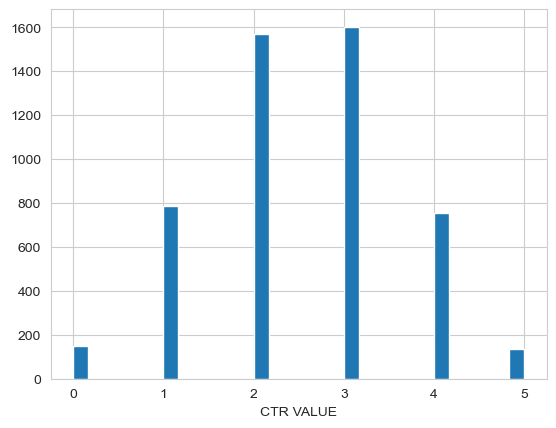

In [45]:
sns.set_style('whitegrid')
data['CTR VALUE'].hist(bins=30)
plt.xlabel('CTR VALUE')

In [46]:
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model, preprocessing

In [47]:
predict = "CTR VALUE"

In [48]:
le = preprocessing.LabelEncoder()
userid = le.fit_transform(list(data["userid"]))
gender = le.fit_transform(list(data["gender"]))
age = le.fit_transform(list(data["age"]))
consumptionlevel = le.fit_transform(list(data["consumption level"]))
shoppinglevel = le.fit_transform(list(data["shopping level"]))
occupationlevel = le.fit_transform(list(data[" occupation level"]))
ad1 = le.fit_transform(list(data["ad1"]))
ad2 = le.fit_transform(list(data["ad2"]))
ad3 = le.fit_transform(list(data["ad3"]))
ad4 = le.fit_transform(list(data["ad4"]))
ad5 = le.fit_transform(list(data["ad5"]))
CTRVALUE = le.fit_transform(list(data["CTR VALUE"]))

In [49]:
x = list(zip(gender,age,consumptionlevel,shoppinglevel,occupationlevel,ad1,ad2,ad3,ad4,ad5))
y = list(CTRVALUE)

In [50]:
import pandas as pd
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model, preprocessing
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [51]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
print(accuracy)

0.642


In [53]:
cv2=0.588

In [54]:
y_axis=np.array([cv1,cv2])
x_axis=np.array(["Logistic regression","KNN"])

Text(0.5, 1.0, 'Accuracy of Classification Algorithms')

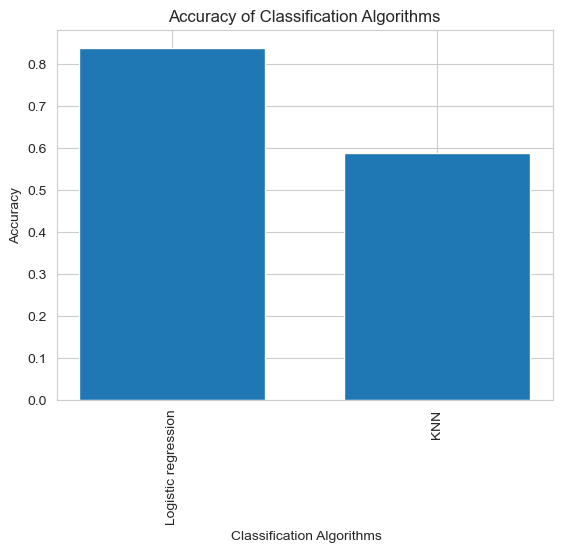

In [55]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)

plt.xlabel(" Classification Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of Classification Algorithms")